In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

from mvdr.toy_data.joint_fact_model import sample_joint_factor_model
from mvdr.ajive.AJIVE import AJIVE

In [2]:
# sample a muti-view factor model
n_samples = 500
n_features = [20, 30, 40]
noise_std = .5 # noise level
joint_rank = 5 # true joint rank
n_views = len(n_features)

Xs = sample_joint_factor_model(n_samples=n_samples, n_features=n_features,
                               joint_rank=joint_rank, noise_std=noise_std,
                               m=10)[0]

In [3]:
# fit AJIVE
ajive = AJIVE(init_signal_ranks=[6, 7, 8]).fit(Xs)
# ajive = AJIVE(init_signal_ranks=[5, 5, 5]).fit(Xs)  # correct signal ranks

ajive.summary()

'AJIVE, joint rank: 5, view 0 indiv rank: 1, view 1 indiv rank: 2, view 2 indiv rank: 3'

In [4]:
pprint(ajive.view_specific_)

# the view specific joint resutls are a PCA object
print(ajive.view_specific_[0].joint_)

# the view specific individual resutls are also a PCA object
print(ajive.view_specific_[0].individual_)

{0: View: 0, individual rank: 1, joint rank: 5,
 1: View: 1, individual rank: 2, joint rank: 5,
 2: View: 2, individual rank: 3, joint rank: 5}
PCA(n_components=5)
PCA(n_components=1)


In [5]:
# the common results are stored in a SumCorrAvgVar object
# see SumCorrAvgVar documentation for details
print(ajive.common_)

MCCA(n_components=5, signal_ranks=[6, 7, 8])


In [6]:
# joint rank estimation data stored in rank_est_
ajive.rank_est_.keys()

dict_keys(['svalsq_threshold', 'rand', 'wedin', 'all_common_svals', 'identif_dropped'])

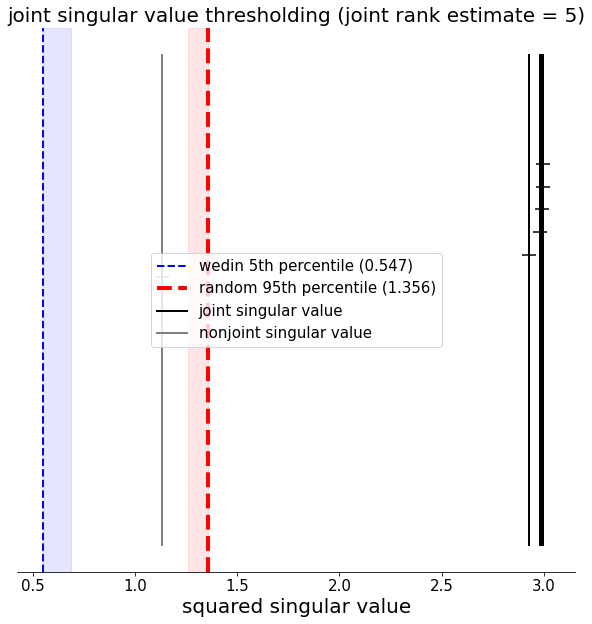

In [7]:
plt.figure(figsize=(10, 10))
ajive.plot_joint_diagnostic()